# Demonstrating the different strategies of KBinsDiscretizer

This example presents the different strategies implemented in KBinsDiscretizer: 

- ‘uniform’: The discretization is uniform in each feature, which means that the bin widths are constant in each dimension. 
- quantile’: The discretization is done on the quantiled values, which means that each bin has approximately the same number of samples. 
- ‘kmeans’: The discretization is based on the centroids of a KMeans clustering procedure.

------------------

此示例介绍了在KBinsDiscretizer中实现的不同策略： 

- 'uniform'：每个特征中的离散化是均匀的，这意味着每个维度中的bin宽度是恒定的。

- quantile'：离散化是在quantiled values上完成的，这意味着每个bin具有大约相同数量的样本。 

- 'kmeans'：离散化基于KMeans聚类过程的质心。

The plot shows the regions where the discretized encoding is constant.

------------------

该图显示了离散编码不变的区域。

In [2]:
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

print(__doc__)

Automatically created module for IPython interactive environment


In [3]:
strategies = ['uniform','quantile','kmeans']
n_samples = 200

centers_0 = np.array([[0, 0], [0, 5], [2, 4], [8, 8]])
centers_1 = np.array([[0, 0], [3, 1]])

In [5]:
random_state = 66
# make_blobs
# make_blobs和make_classification都通过为每个类分配一个或多个正态分布的点集来创建多类数据集。 
# make_blobs提供了对每个集群的中心和标准偏差的更大控制，并用于演示集群。 
# make_classification专门通过以下方式引入噪声：相关，冗余和无信息特征;每级多个高斯聚类;和特征空间的线性变换。
X_list = [
    np.random.RandomState(random_state).uniform(-3, 3, size=(n_samples, 2)),
    make_blobs(n_samples=[n_samples // 10, n_samples * 4 // 10,
                          n_samples // 10, n_samples * 4 // 10],
               cluster_std=0.5, centers=centers_0,
               random_state=random_state)[0],
    make_blobs(n_samples=[n_samples // 5, n_samples * 4 // 5],
               cluster_std=0.5, centers=centers_1,
               random_state=random_state)[0],
]

/A/develop/ide/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


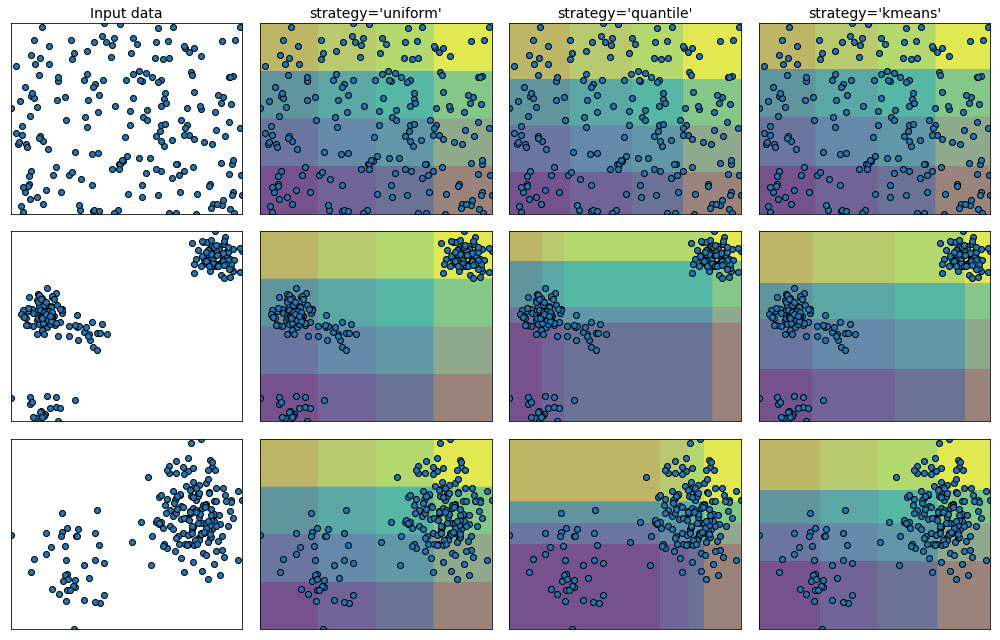

In [6]:
figure = plt.figure(figsize=(14,9))
i = 1
for ds_cnt, X in enumerate(X_list):
    ax = plt.subplot(len(X_list), len(strategies) + 1, i)
    ax.scatter(X[:, 0], X[:, 1], edgecolors='k')
    if ds_cnt == 0:
        ax.set_title("Input data", size=14)

    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min(), X[:, 0].max(), 300),
        np.linspace(X[:, 1].min(), X[:, 1].max(), 300))
    grid = np.c_[xx.ravel(), yy.ravel()]

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())  
    
    i += 1
    # transform the dataset with KBinsDiscretizer
    for strategy in strategies:
        enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy=strategy)
        enc.fit(X)
        grid_encoded = enc.transform(grid)

        ax = plt.subplot(len(X_list), len(strategies) + 1, i)

        # horizontal stripes
        horizontal = grid_encoded[:, 0].reshape(xx.shape)
        ax.contourf(xx, yy, horizontal, alpha=.5)
        # vertical stripes
        vertical = grid_encoded[:, 1].reshape(xx.shape)
        ax.contourf(xx, yy, vertical, alpha=.5)

        ax.scatter(X[:, 0], X[:, 1], edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title("strategy='%s'" % (strategy, ), size=14)

        i += 1

plt.tight_layout()
plt.show()